In [39]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import math

#Question 1
I have captured a video with 30 frames per second and i am just storing the one image per second

In [40]:
vidcap = cv2.VideoCapture(r'E:\GSU\CV\Assignment_3\vid1.mp4')
check,image = vidcap.read()
count = 0
inc=0
while check:
    check,image = vidcap.read()
    if count%30==0 :
      inc+=1
      cv2.imwrite(r"E:\GSU\CV\Assignment_3\data\frame%d.jpg" % inc, image)        
    count += 1

Function to compute the Squared Distance


In [41]:
def sum_squ_dis(cropped,orginal):
    squares = (cropped[:,:,:3] - orginal[:,:,:3]) ** 2
    return math.sqrt(np.sum(squares))

In [42]:
import cv2
import os
source_dest='E:\GSU\CV\Assignment_3\data'
li=[]
for file_name in os.listdir('E:\GSU\CV\Assignment_3\data'):
    li.append(file_name)

files = []
li=['data/' + s for s in li]
print(li)
images = [cv2.imread(file) for file in li]

['data/frame0.jpg', 'data/frame1.jpg', 'data/frame10.jpg', 'data/frame11.jpg', 'data/frame12.jpg', 'data/frame2.jpg', 'data/frame3.jpg', 'data/frame4.jpg', 'data/frame5.jpg', 'data/frame6.jpg', 'data/frame7.jpg', 'data/frame8.jpg', 'data/frame9.jpg', 'data/output_registration.jpg', 'data/_mask.png', 'data/_mask_11.png']


(1080, 1920, 3)


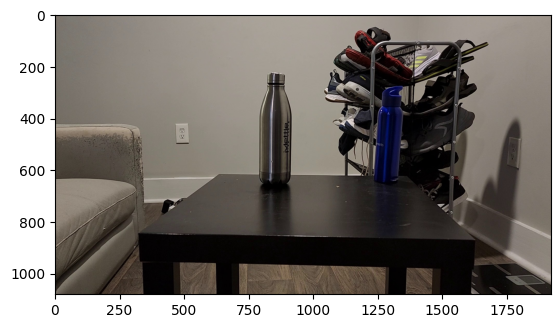

In [43]:
print(np.shape(images[0]))
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

Now let's crop the socket part in the image

True

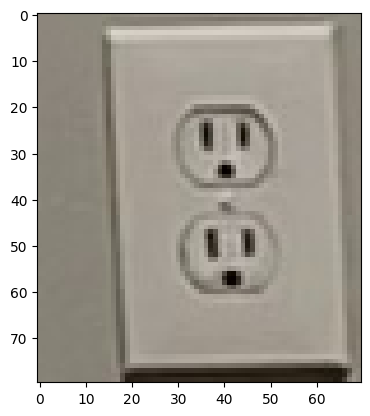

In [44]:
cropped_image = images[0][420:500,450:520]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

cv2.imwrite("Cropped Image.jpg", cropped_image)

In [45]:
d=dict()
d_norm=dict()
for i in range(0,620,20):
    for j in range(0,1180,20):
        d[str(i)+":"+str(i+80),str(j)+":"+str(j+70)]=sum_squ_dis(cropped_image,images[3][i:i+80,j:j+70])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))

So taking the least distance and marking the coordinates

In [46]:
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))


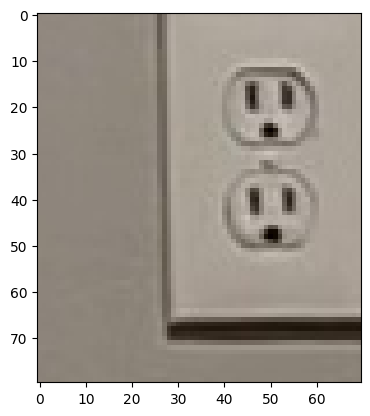

In [47]:
plt.imshow(cv2.cvtColor(images[3][y1:y2,x1:x2], cv2.COLOR_BGR2RGB))

In [48]:
color = (0, 255, 0)
thickness = 2
image = cv2.rectangle(images[3], (x1,y1), (x2,y2), color, thickness)

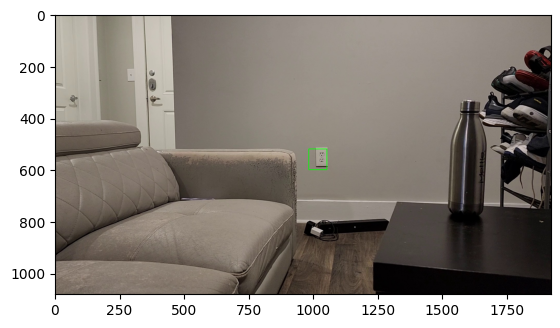

In [49]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Question 2
Motion Function Estimates

In [50]:
Iref=cv2.imread(r'E:\GSU\CV\Assignment_3\data\frame0.jpg',cv2.IMREAD_GRAYSCALE)
Inext=cv2.imread(r'E:\GSU\CV\Assignment_3\data\frame1.jpg',cv2.IMREAD_GRAYSCALE)
Iref=np.array(Iref).astype(np.float32)
Inext=np.array(Inext).astype(np.float32)
kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
kernel_t = np.array([[1., 1.], [1., 1.]])*.25
Iref = Iref / 255. # normalize pixels
Inext = Inext / 255. # normalize pixels
Ix=cv2.filter2D(Iref,-1,kernel=kernel_x)
Iy=cv2.filter2D(Iref,-1,kernel=kernel_y)
It=cv2.filter2D(Iref,-1,kernel=kernel_t)+cv2.filter2D(Inext,-1,kernel=kernel_x)
Ix,Iy,It=np.array(Ix),np.array(Iy),np.array(It)


In [51]:
u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))
print(u)


[[5.6500004e+01 5.8500004e+01 9.2174591e+01 ... 3.9607392e+07
  4.2709256e+02 9.6133263e+01]
 [5.6500004e+01 5.8500004e+01 9.2174591e+01 ... 3.9607392e+07
  4.2709579e+02 9.6133263e+01]
 [5.6500004e+01 5.8500004e+01 1.1500001e+02 ... 7.6250153e+01
  1.0166668e+02 3.0500003e+02]
 ...
 [3.2809760e+02 3.2951178e+02 3.4943169e+01 ... 1.7819078e+01
  1.9233295e+01 1.4613537e+01]
 [2.3200002e+02 2.3200002e+02 3.6167782e+01 ... 8.3438606e+01
  2.1265806e+01 1.6122023e+01]
 [6.2681126e+01 6.4345230e+01 5.9087898e+01 ... 2.0579823e+01
  3.7314880e+01 1.4087227e+01]]


C:\Users\Harshith\AppData\Local\Temp\ipykernel_15508\4259202780.py:1: RuntimeWarning: divide by zero encountered in divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))
C:\Users\Harshith\AppData\Local\Temp\ipykernel_15508\4259202780.py:1: RuntimeWarning: invalid value encountered in divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))


Image Registration

In [52]:
import cv2
import numpy as np
 
def image_registraion(align,ref):

# Open the image files.
  img1_color = align  # Image to be aligned.
  img2_color = ref    # Reference image.
  
  # Convert to grayscale.
  img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
  height, width = img2.shape
  
  # Create ORB detector with 5000 features.
  orb_detector = cv2.ORB_create(5000)
  
  # Find keypoints and descriptors.
  # The first arg is the image, second arg is the mask
  #  (which is not required in this case).
  kp1, d1 = orb_detector.detectAndCompute(img1, None)
  kp2, d2 = orb_detector.detectAndCompute(img2, None)
  
  # Match features between the two images.
  # We create a Brute Force matcher with
  # Hamming distance as measurement mode.
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
  
  # Match the two sets of descriptors.
  matches = matcher.match(d1, d2)
  
  # Sort matches on the basis of their Hamming distance.
  matches=sorted(matches,key = lambda x: x.distance)
  
  # Take the top 90 % matches forward.
  matches = matches[:int(len(matches)*0.9)]
  no_of_matches = len(matches)
  
  # Define empty matrices of shape no_of_matches * 2.
  p1 = np.zeros((no_of_matches, 2))
  p2 = np.zeros((no_of_matches, 2))
  
  for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt
  
  # Find the homography matrix.
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
  
  # Use this matrix to transform the
  # colored image wrt the reference image.
  transformed_img = cv2.warpPerspective(img1_color,
                      homography, (width, height))
  return transformed_img


In [53]:
# importing the necessary libraries
import cv2
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture(r'E:\GSU\CV\Assignment_3\vid1.mp4')
ret, frame = cap.read()

# Loop until the end of the video
while (cap.isOpened()):
	# Capture frame-by-frame
	prev=frame
	ret, frame = cap.read()
	disp=image_registraion(frame,prev)

	
	disp = cv2.resize(disp, (540, 380), fx = 0, fy = 0,
						interpolation = cv2.INTER_CUBIC)

	# Display the resulting frame
	cv2.imshow('Frame', disp)

	# define q as the exit button
	if cv2.waitKey(25) & 0xFF == ord('q'):
		break

# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()


Question - 3
Optical Flow Vector

In [54]:
import cv2 as cv2
import numpy as np
def optical_flow(n):
    cap = cv2.VideoCapture(r"E:\GSU\CV\Assignment_3\vid1.mp4")
    feature_params = dict( maxCorners = 100,
                        qualityLevel = 0.3,
                        minDistance = 7,
                        blockSize = 7 )
    # Parameters for lucas kanade optical flow
    lk_params = dict( winSize  = (15, 15),
                    maxLevel = 2,
                    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    # Create some random colors
    color = np.random.randint(0, 255, (100, 3))
    # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
    # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)

    count=0
    while(1):
        ret, frame = cap.read()
        count+=1
        if not ret:
            print('No frames grabbed!')
            break
        if(count%n==0):
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
            # Select good points
            if p1 is not None:
                good_new = p1[st==1]
                good_old = p0[st==1]
            # draw the tracks
            for i, (new, old) in enumerate(zip(good_new, good_old)):
                a, b = new.ravel()
                c, d = old.ravel()
                mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
                frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
            img = cv2.add(frame, mask)
            cv2.imshow('frame', img)
            if cv2.waitKey(1)==ord('q'):
                break
            # Now update the previous frame and previous points
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1, 1, 2)
    cv2.destroyAllWindows()

Considering Every alternative frame


In [55]:
optical_flow(1)

No frames grabbed!


Considering Every 11th frame

In [56]:
optical_flow(11)

No frames grabbed!


Considering Every 31st frame

In [57]:
optical_flow(31)

No frames grabbed!


Question 4
Feature Based detection using template matching


In [58]:
import cv2 as cv
import math as math
import numpy as np
org=cv.imread(r'C:\Users\Harshith\Desktop\image_scenec.jpg')
ref=cv.imread(r'C:\Users\Harshith\Desktop\car_cropped.jpg')
#org = cv.cvtColor(org, cv.COLOR_BGR2GRAY)
#ref=cv.cvtColor(ref, cv.COLOR_BGR2GRAY)
print(ref.shape)
print(org.shape)

(143, 144, 3)
(780, 1000, 3)


In [59]:
def sum_squ_dis(cropped,orginal):
    squares = (cropped[:,:,:3] - orginal[:,:,:3]) ** 2
    return math.sqrt(np.sum(squares))

In [60]:
d=dict()
d_norm=dict()
for i in range(0,637,20):
    for j in range(0,856,20):
        d[str(i)+":"+str(i+143),str(j)+":"+str(j+144)]=sum_squ_dis(ref,org[i:i+143,j:j+144])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))

In [61]:
a=sorted(d.items(), key=lambda x: x[1])

In [62]:
#print(d.items())
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))


In [63]:
color = (0, 255, 0)
thickness = 2
image = cv.rectangle(org, (x1,y1), (x2,y2), color, thickness)
image=cv.rectangle(org, (850,420), (1000,540), color, thickness)
cv.putText(image, 'ball', (x1+30, y1+30), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
cv.putText(image, 'ball', (900, 480), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17],
        ...,
        [ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17]],

       [[ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17],
        ...,
        [ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17]],

       [[ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17],
        ...,
        [ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17]]

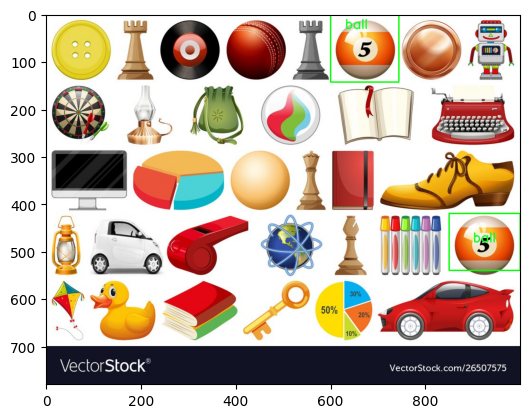

In [64]:
import matplotlib.pyplot as plt
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))


(780, 1000, 3)
(65, 69, 3)


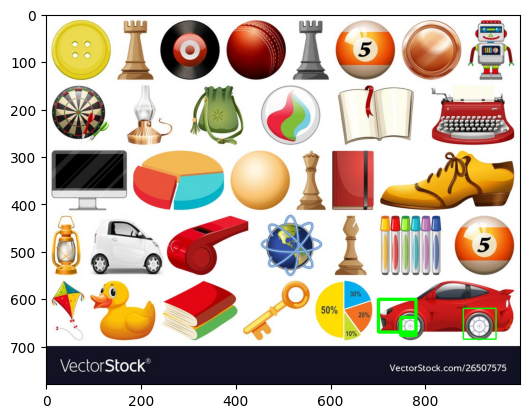

In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(r'C:\Users\Harshith\Desktop\image_scenec.jpg')
query = cv2.imread(r'C:\Users\Harshith\Desktop\tyre.jpg')
print(img.shape)
print(query.shape)
OBJECT_WIDTH_LIMITER = 200  # Variable to delimit the max width of the BBoxes

# Obtain a mask for identifying each product
# First obtain a mask with the whitish colours
white_mask = cv2.inRange(img, (180, 180, 180), (255, 255, 255))
white_mask = white_mask.astype(float) / 255
white_mask = cv2.morphologyEx(white_mask, cv2.MORPH_OPEN, np.ones((1, 10), np.uint8))

# Transform image to hsv, threshold the v channel
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, s, v = cv2.split(img)
_, mask = cv2.threshold(v, 0, 1, cv2.THRESH_OTSU)

# Segment the whitests parts of the image
mask[white_mask == 1] = 0

# Apply small closing
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((2, 2), np.uint8))

# Detect all the connected components
n, conComp, stats, centroids = cv2.connectedComponentsWithStats(mask)

# Create SIFT object
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(query, None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.

# Iterate through each DMatch object and obtain the keypoint position of the good matches
good_keypoints = [kp1[match[0].queryIdx].pt for match in good]

# Obtain the connected components which each keypoint beongs
# If the connected component is wider than OBJECT_WIDTH_LIMITER, crop the connected component
# Create a mask with all the connected components that belong to keypoints
cc_filtered = np.zeros((img.shape[0], img.shape[1]), np.uint8)
for kp in good_keypoints:
    ccNumber = conComp[int(kp[1]), int(kp[0])]

    mask = np.zeros((img.shape[0], img.shape[1]), np.uint8)
    if ccNumber != 0:
        if int(kp[0]) - OBJECT_WIDTH_LIMITER < 0:
            left_limit = 0
        else:
            left_limit = int(kp[0]) - OBJECT_WIDTH_LIMITER

        if int(kp[0]) + OBJECT_WIDTH_LIMITER > img.shape[0]:
            right_limit = img.shape[0]
        else:
            right_limit = int(kp[0]) + OBJECT_WIDTH_LIMITER

        mask[conComp == ccNumber] = 1
        mask[:, right_limit:] = 0
        mask[:, :left_limit] = 0
        cc_filtered[mask == 1] = ccNumber

# Draw the BBoxes for each connected connected component
n, conComp, stats, centroids = cv2.connectedComponentsWithStats(cc_filtered)
for ccNumber in range(n):
    if ccNumber != 0:
        tl = (stats[ccNumber, cv2.CC_STAT_LEFT], stats[ccNumber, cv2.CC_STAT_TOP])
        br = (
            stats[ccNumber, cv2.CC_STAT_LEFT] + stats[ccNumber, cv2.CC_STAT_WIDTH],
            stats[ccNumber, cv2.CC_STAT_TOP] + stats[ccNumber, cv2.CC_STAT_HEIGHT],
        )
        cv2.rectangle(img, tl, br, (0, 255, 0), 5)

d=dict()
d_norm=dict()
for i in range(0,715,20):
    for j in range(0,939,20):
        d[str(i)+":"+str(i+65),str(j)+":"+str(j+69)]=sum_squ_dis(query,img[i:i+65,j:j+69])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))
color = (0, 255, 0)
thickness = 2
img = cv.rectangle(img, (x1,y1), (x2,y2), color, thickness)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Question 5
Face Tracking using Haar Cascade

In [66]:
import os
import time

import imutils
detectorPaths = {
    
    "face": "face.xml",
}

print("[INFO] loading haar cascades...")
detectors = dict()
 
for (name, path) in detectorPaths.items():
    detectors[name] = cv2.CascadeClassifier(path)

print("[INFO] starting video stream...")
vs = cv2.VideoCapture(0)

while True:
    _,frame = vs.read()
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faceRects = detectors["face"].detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)

    for (fX, fY, fW, fH) in faceRects:
        faceROI = gray[fY:fY + fH, fX:fX + fW]

        
        cv2.rectangle(frame, (fX, fY), (fX + fW, fY + fH),
                      (0, 255, 0), 2)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()


[INFO] loading haar cascades...
[INFO] starting video stream...


In [32]:
# importing the module
import cv2

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

	# checking for left mouse clicks
	if event == cv2.EVENT_LBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font,
					1, (255, 0, 0), 2)
		cv2.imshow('image', img)

	# checking for right mouse clicks	
	if event==cv2.EVENT_RBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		b = img[y, x, 0]
		g = img[y, x, 1]
		r = img[y, x, 2]
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r),
					(x,y), font, 1,
					(255, 255, 0), 2)
		cv2.imshow('image', img)

# driver function
if __name__=="__main__":

	# reading the image
	img = cv2.imread(r'E:\GSU\CV\Assignment_3\image6.jpg', 1)

	# displaying the image
	cv2.imshow('image', img)

	# setting mouse handler for the image
	# and calling the click_event() function
	cv2.setMouseCallback('image', click_event)

	# wait for a key to be pressed to exit
	cv2.waitKey(0)

	# close the window
	cv2.destroyAllWindows()


This is used to estimate the distace using disparity
The orginal distance was 740mm

In [67]:
ul,vl= 145 ,  213 #x and y points
ur,vr=440  , 313
b=152.2 # distance between left and right cameras
f=1329.30324 #focallength
z=(b*f)/(ur-ul) #distance of object
print('The distance is '+str(z)+'mm')


The distance is 685.8303495864405mm


Question 7
Lucas - Kanade Algorithm

In [68]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

# Create old frame
_, frame = cap.read()
old_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Lucas kanade params
lk_params = dict(winSize = (15, 15),
maxLevel = 4,
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Mouse function
def select_point(event, x, y, flags, params):
    global point, point_selected, old_points
    if event == cv2.EVENT_LBUTTONDOWN:
        point = (x, y)
        point_selected = True
        old_points = np.array([[x, y]], dtype=np.float32)

cv2.namedWindow("Frame")
cv2.setMouseCallback("Frame", select_point)

point_selected = False
point = ()
old_points = np.array([[]])

while True:
    _, frame = cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if point_selected is True:
        cv2.circle(frame, point, 5, (0, 0, 255), 2)

        new_points, status, error = cv2.calcOpticalFlowPyrLK(old_gray, gray_frame, old_points, None, **lk_params)
        old_gray = gray_frame.copy()
        old_points = new_points

        x, y = new_points.ravel()
        cv2.circle(frame, (int(x), int(y)), 5, (0, 255, 0), -1)

    cv2.imshow("Frame", frame)

    key = cv2.waitKey(1)
    if key == 27:
        break


cap.release()
cv2.destroyAllWindows()

you can see the motion of green point